In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import scipy
import time

In [2]:
knots = np.array([0]*2 + list(np.arange(0,10)) + [10]*3)
knots

array([ 0,  0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10])

In [3]:
sigma = 5.0
mu = 5
splines = []
for i in range(0,13):
    coeffs = np.zeros(13)
    coeffs[i] = 1.0
    spline = scipy.interpolate.BSpline(knots,coeffs, 3)
    splines.append(spline)

In [4]:
coeffs = np.zeros(13)
bins = np.zeros(11)
n = 0
def score_data(x):
    global coeffs, bins, n
    n += 1
    bins[int(np.floor(x))] += 1
    for i,spline in enumerate(splines):
        inner_product = 1.0 * scipy.interpolate.splev(x, spline)
        if inner_product> 0:
            coeffs[i] += inner_product

In [5]:
def normal(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

In [6]:
def plot():
    global mu, sigma
    fig, ax = plt.subplots()
    histos = ax.bar(np.arange(0,11),np.zeros(11))
    xs = np.linspace(0,10,100)
    y = np.zeros_like(xs)
    ax.plot(xs, normal(xs, mu, sigma), "k-")
    spline_line = ax.plot(xs,y,"k--")[0]
    plot_knots = []
    control_points = []
    for x in knots:
        control_points.append(ax.plot(x+2,0, "rx")[0])
        plot_knots.append(ax.plot(x,0, "r+")[0])
    plt.title(f"n=0")
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.show()
    def update_plot(coeffs, bins, n):
        nonlocal xs
        for value, bar in zip(bins/n, histos):
            bar.set_height(value)
        spline = scipy.interpolate.BSpline(knots, coeffs/n, 3)
        y = scipy.interpolate.splev(xs, spline)
        spline_line.set_ydata(y)
        ax.set_title(f"n={n}")
        for x, knot in zip(knots, plot_knots):
            knot.set_ydata(scipy.interpolate.splev(x, spline))
        for (control_point, coeff) in zip(control_points, coeffs/n):
            control_point.set_ydata(coeff)
        return (histos, spline_line, plot_knots, control_points)
    return (fig, update_plot)

def score_and_plot(frame, updater):
    global n
    while True:
        x = np.random.normal(mu, sigma, 1)
        if x >=0 and x < 10:
            break
    score_data(x)
    return updater(coeffs, bins, n)
    
    

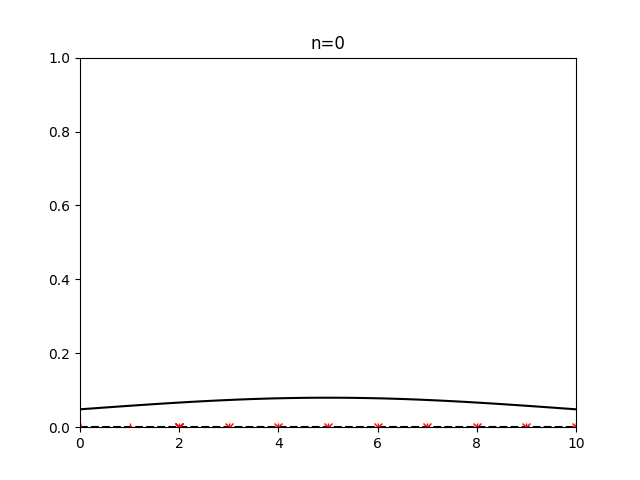

In [7]:
%matplotlib widget
fig, updater = plot()
ani = animation.FuncAnimation(fig=fig, func=score_and_plot, fargs=[updater], frames=1000, interval=20, repeat=False)
#ani.save("stochastic_update.gif")